In [601]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import cm
from io import StringIO
from sklearn.model_selection import train_test_split

In [602]:
speed = 400
tau = 20

In [603]:
file_name = f"./data/u{tau}/onefourth/data{speed}0000.csv"

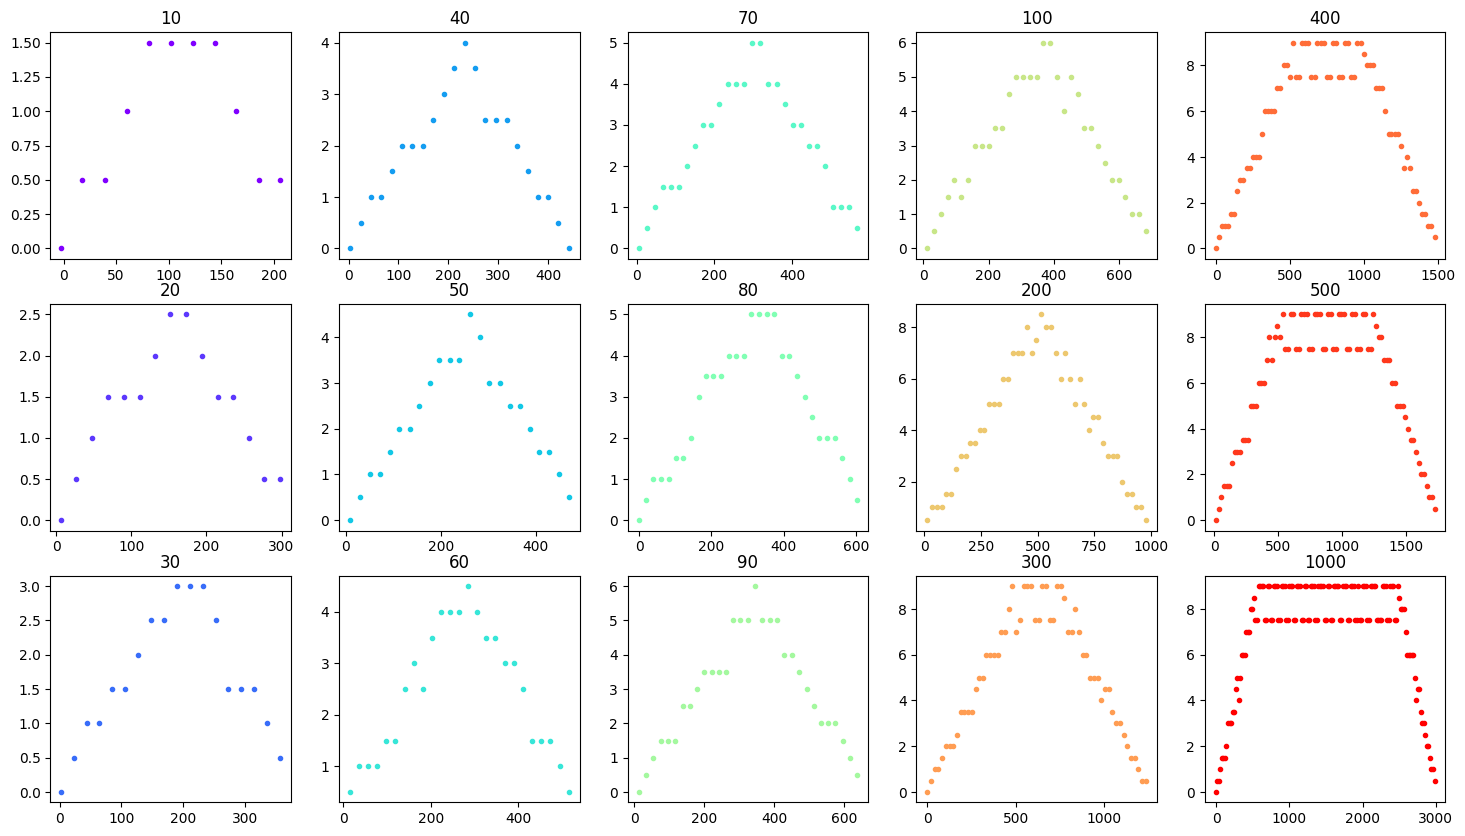

In [604]:
with open(file_name, "r") as f:
    data = f.read()

split_data = data.split("\n\n")[:-1]
# print(split_data[0])

color = cm.rainbow(np.linspace(0, 1, len(split_data)))

targets = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 1000]
fig, ax = plt.subplots(
    nrows=3, ncols=len(targets) // 3, num=file_name, figsize=(18, 10)
)
dfs = []
for i, split in enumerate(split_data):
    df = pd.read_csv(StringIO(split), sep=",", header=None)
    times = df[0].to_numpy()
    locations = df[1].to_numpy()
    speeds = [y - x for x, y in zip(locations, locations[1:])]
    speeds = [(x + y) / 2 for x, y in zip(speeds + [0], [0] + speeds)]
    # speeds += [0]
    df[2] = speeds
    accelerations = [y - x for x, y in zip(speeds, speeds[1:])]
    accelerations = [
        (x + y) / 2 for x, y in zip(accelerations + [0], [0] + accelerations)
    ]
    # accelerations += [0]
    df[3] = accelerations
    # ax[i % 3][i // 3].scatter(times, locations, c=[color[i]], marker='.')
    ax[i % 3][i // 3].scatter(times, speeds, c=[color[i]], marker=".")
    ax[i % 3][i // 3].set_title(targets[i])
    dfs.append(df)
plt.show()

In [605]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [606]:
idx = -4
df = dfs[idx]

In [607]:
df[0] = df[0] - df[0][0]

In [608]:
yt = df[2]
Xt = df[0]

In [609]:
yt

0     0.0
1     0.5
2     1.0
3     1.0
4     1.5
5     2.0
6     2.0
7     2.0
8     2.5
9     3.5
10    3.5
11    3.5
12    3.5
13    4.5
14    5.0
15    5.0
16    6.0
17    6.0
18    6.0
19    6.0
20    7.0
21    7.0
22    8.0
23    9.0
24    7.0
25    7.5
26    9.0
27    9.0
28    9.0
29    7.5
30    7.5
31    9.0
32    9.0
33    7.5
34    7.5
35    9.0
36    9.0
37    8.5
38    7.0
39    7.0
40    8.0
41    7.0
42    6.0
43    6.0
44    5.0
45    5.0
46    5.0
47    4.0
48    4.5
49    4.5
50    3.5
51    3.0
52    3.0
53    2.5
54    2.0
55    1.5
56    1.5
57    1.0
58    0.5
59    0.5
Name: 2, dtype: float64

In [610]:
consider_till = yt.argmax() + 1
consider_till

24

In [611]:
X1 = np.array(Xt[:consider_till]).reshape(-1, 1)
y1 = np.array(yt[:consider_till]).reshape(-1, 1)

In [612]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.1)

In [613]:
regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.8973486935314445


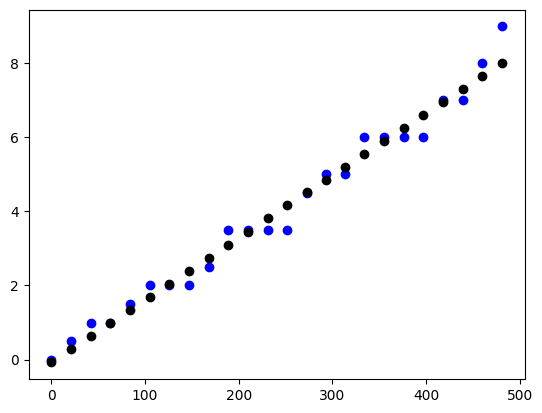

In [614]:
y_pred = regr.predict(X1)
plt.scatter(X1, y1, color="b")
plt.scatter(X1, y_pred, color="k")

plt.show()

In [615]:
regr.coef_, regr.intercept_

(array([[0.01684494]]), array([-0.08030664]))

In [616]:
m1 = []
b1 = []
for i in range(len(dfs)):
    df = dfs[i]
    df[0] = df[0] - df[0][0]
    y_ = df[2]
    X_ = df[0]
    consider_till = y_[::-1].argmax() + 1
    X1_ = np.array(X_[:consider_till]).reshape(-1, 1)
    y1_ = np.array(y_[:consider_till]).reshape(-1, 1)
    # X_train, X_test, y_train, y_test = train_test_split(X1_, y1_, test_size = 0.1)
    regr_ = LinearRegression()
    regr_.fit(X1_, y1_)
    print(regr_.score(X1_, y1_))
    m1.append(regr_.coef_[0])
    b1.append(regr_.intercept_[0])

0.8969781822424454
0.901247106959828
0.9517926697114758
0.967852479102908
0.9837490570230778
0.9395596688283333
0.9793469685353603
0.9389992986154725
0.9581475870543259
0.9650950564465662
0.9788519541248153
0.9785823974418231
0.981597622305041
0.9784929477784016
0.9824516545650125


In [617]:
b1

[0.05512775638781936,
 0.23832746853080744,
 0.1633625503811975,
 0.1569146209489094,
 0.09158877448376379,
 0.32119418005845635,
 0.17156113718669452,
 -0.006815467666718478,
 0.2069469768519725,
 0.20590924202127692,
 0.29576591437428235,
 -0.04944147305562385,
 -0.0272977085576116,
 0.08201574525513156,
 -0.07521203425350231]

In [618]:
np.var(m1), np.mean(m1), np.var(b1), np.mean(b1)

(6.094385512310472e-07,
 0.015898235185335192,
 0.014480761160081745,
 0.12199651219645703)

In [619]:
consider_from = len(yt) - yt[::-1].argmax() + 1
consider_from

38

In [620]:
X2 = np.array(Xt[consider_from:]).reshape(-1, 1)
y2 = np.array(yt[consider_from:]).reshape(-1, 1)

In [621]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2)

In [622]:
regr2 = LinearRegression()

regr2.fit(X_train, y_train)
print(regr2.score(X_test, y_test))

0.9888583356924667


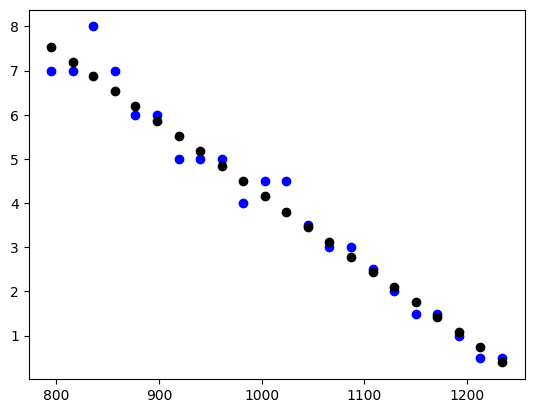

In [623]:
y_pred = regr2.predict(X2)
plt.scatter(X2, y2, color="b")
plt.scatter(X2, y_pred, color="k")

plt.show()

In [624]:
regr2.coef_, regr2.intercept_

(array([[-0.01627433]]), array([20.47500094]))

In [625]:
m2 = []
b2 = []
for i in range(len(dfs)):
    df = dfs[i]
    df[0] = df[0] - df[0][0]
    y_ = df[2]
    X_ = df[0]
    consider_from = len(y_) - y_[::-1].argmax() + 1
    X2_ = np.array(X_[consider_from:]).reshape(-1, 1)
    y2_ = np.array(y_[consider_from:]).reshape(-1, 1)
    # X_train, X_test, y_train, y_test = train_test_split(X2_, y2_, test_size = 0.2)
    regr_ = LinearRegression()
    regr_.fit(X2_, y2_)
    print(regr_.score(X2_, y2_))
    m2.append(regr_.coef_[0])
    b2.append(regr_.intercept_[0])

1.0
0.8970409782507234
0.7812500000000002
0.9500018648320795
0.9644365579129824
0.951963590304129
0.9633605568185009
0.9617326756648843
0.9746949918452252
0.9441313234306996
0.965296950297743
0.9702196935979184
0.9827146492690387
0.9915990750319561
0.9794513066909256


In [626]:
b2

[0.5,
 4.611313357602912,
 4.902380952380952,
 7.183498253783467,
 7.672153108414817,
 8.907165145100114,
 9.814427426576955,
 10.81161007667032,
 11.614558617016126,
 11.905325400919203,
 16.62333846339395,
 20.733333364560547,
 25.88590416161834,
 30.203338763434832,
 50.34183477461622]

In [627]:
np.var(m2), np.mean(m2)

(1.8301114959293668e-05, -0.015130770105314221)

In [628]:
np.mean(m1), np.mean(m2)

(0.015898235185335192, -0.015130770105314221)

In [629]:
m1 = np.mean(m1)
m2 = np.mean(m2)

In [630]:
regr2.coef_

array([[-0.01627433]])

In [631]:
y1

array([[0. ],
       [0.5],
       [1. ],
       [1. ],
       [1.5],
       [2. ],
       [2. ],
       [2. ],
       [2.5],
       [3.5],
       [3.5],
       [3.5],
       [3.5],
       [4.5],
       [5. ],
       [5. ],
       [6. ],
       [6. ],
       [6. ],
       [6. ],
       [7. ],
       [7. ],
       [8. ],
       [9. ]])

In [632]:
(np.round(m1 * X1 * 2) / 2)

array([[0. ],
       [0.5],
       [0.5],
       [1. ],
       [1.5],
       [1.5],
       [2. ],
       [2.5],
       [2.5],
       [3. ],
       [3.5],
       [3.5],
       [4. ],
       [4.5],
       [4.5],
       [5. ],
       [5.5],
       [5.5],
       [6. ],
       [6.5],
       [6.5],
       [7. ],
       [7.5],
       [7.5]])

In [633]:
slope_count_pred = (np.round(m1 * X1 * 2) / 2).sum() * 2
slope_count_real = y2.sum() + y1.sum()
slope_count_pred, slope_count_real

(184.0, 184.0)

In [634]:
flat_remaining_count = targets[idx] - slope_count_pred

In [635]:
s = tau * speed / 1000
flat_time = round(flat_remaining_count / s)
flat_time, s, flat_remaining_count % s

(14, 8.0, 4.0)

In [636]:
yt.sum(), flat_time * s + slope_count_pred

(300.0, 296.0)

Now note that X1 won't be available to us, so we can use the fact that slope of speed
is constant until it saturates

In [637]:
till = (
    s + 0.5
) / m1  # allow top speed to saturate above by 0.5 for 400 pulses per second u20 observation
till

534.6505383088399

In [638]:
X1new = np.arange(0, int(till), tau)
slope_time = len(X1new)
X1new

array([  0,  20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240,
       260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500,
       520])

In [639]:
np.round(m1 * X1new * 2) / 2

array([0. , 0.5, 0.5, 1. , 1.5, 1.5, 2. , 2. , 2.5, 3. , 3. , 3.5, 4. ,
       4. , 4.5, 5. , 5. , 5.5, 5.5, 6. , 6.5, 6.5, 7. , 7.5, 7.5, 8. ,
       8.5])

In [640]:
y1pred = np.round(m1 * X1new * 2) / 2
slope_count_pred = y1pred.sum() * 2
slope_count_pred, slope_count_real

(224.0, 184.0)

In [641]:
flat_remaining_count = targets[idx] - slope_count_pred
flat_time = round(flat_remaining_count / s)
flat_time

10

In [642]:
yt.sum(), flat_time * s + slope_count_pred

(300.0, 304.0)

Generate times and their predictions

In [643]:
X3new = np.arange(X1new[-1] + tau, X1new[-1] + (flat_time) * tau + 1, tau)
assert len(X3new) == flat_time

In [644]:
X3new

array([540, 560, 580, 600, 620, 640, 660, 680, 700, 720])

In [645]:
X2new = np.arange(X3new[-1] + tau, X3new[-1] + (slope_time) * tau + 1, tau)
assert len(X2new) == slope_time

In [646]:
X2new

array([ 740,  760,  780,  800,  820,  840,  860,  880,  900,  920,  940,
        960,  980, 1000, 1020, 1040, 1060, 1080, 1100, 1120, 1140, 1160,
       1180, 1200, 1220, 1240, 1260])

In [647]:
b = -((X2new[-1]) * m2)
b, b2[idx]

(19.064770332695918, 20.733333364560547)

In [648]:
y2pred = np.round((m2 * X2new + b) * 2) / 2

In [649]:
y3pred = np.array([s] * flat_time)

In [650]:
ypred = np.concatenate([y1pred, y3pred, y2pred])

In [656]:
ypred.sum(), yt.sum(), len(ypred), len(yt)

(298.0, 300.0, 64, 60)

In [652]:
ypred

array([0. , 0.5, 0.5, 1. , 1.5, 1.5, 2. , 2. , 2.5, 3. , 3. , 3.5, 4. ,
       4. , 4.5, 5. , 5. , 5.5, 5.5, 6. , 6.5, 6.5, 7. , 7.5, 7.5, 8. ,
       8.5, 8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. , 7.5,
       7.5, 7. , 6.5, 6.5, 6. , 5.5, 5.5, 5. , 5. , 4.5, 4. , 4. , 3.5,
       3.5, 3. , 2.5, 2.5, 2. , 2. , 1.5, 1. , 1. , 0.5, 0.5, 0. ])

In [653]:
np.array(yt)

array([0. , 0.5, 1. , 1. , 1.5, 2. , 2. , 2. , 2.5, 3.5, 3.5, 3.5, 3.5,
       4.5, 5. , 5. , 6. , 6. , 6. , 6. , 7. , 7. , 8. , 9. , 7. , 7.5,
       9. , 9. , 9. , 7.5, 7.5, 9. , 9. , 7.5, 7.5, 9. , 9. , 8.5, 7. ,
       7. , 8. , 7. , 6. , 6. , 5. , 5. , 5. , 4. , 4.5, 4.5, 3.5, 3. ,
       3. , 2.5, 2. , 1.5, 1.5, 1. , 0.5, 0.5])

In [ ]:
ypred

array([0. , 0.5, 0.5, 1. , 1.5, 1.5, 2. , 2. , 2.5, 3. , 3. , 3.5, 4. ,
       4. , 4.5, 5. , 5. , 5.5, 5.5, 6. , 6.5, 6.5, 7. , 7.5, 7.5, 8. ,
       8.5, 8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. , 7.5,
       7.5, 7. , 6.5, 6.5, 6. , 5.5, 5.5, 5. , 5. , 4.5, 4. , 4. , 3.5,
       3.5, 3. , 2.5, 2.5, 2. , 2. , 1.5, 1. , 1. , 0.5, 0.5, 0. ])

In [657]:
n = len(ypred)

In [664]:
transform = 0.5 * (np.roll(np.eye(n), -1).T - np.roll(np.eye(n), 1).T)

In [670]:
np.linalg.inv(transform)

LinAlgError: Singular matrix